Assignment : Comparative Study

Objective: Evaluate and compare different search algorithms.

Problem Statement: Given a domain (e.g., pathfinding, puzzle solving), evaluate BFS, DFS, Bi-directional BFS, Uniform Cost Search, Best-First Search, and A* Search.

Tasks: Analyze:
Efficiency: Nodes explored, time taken.
Optimality: Whether the solution is optimal.
Create visualizations to compare algorithms

Generating maze...
Running comparative study...


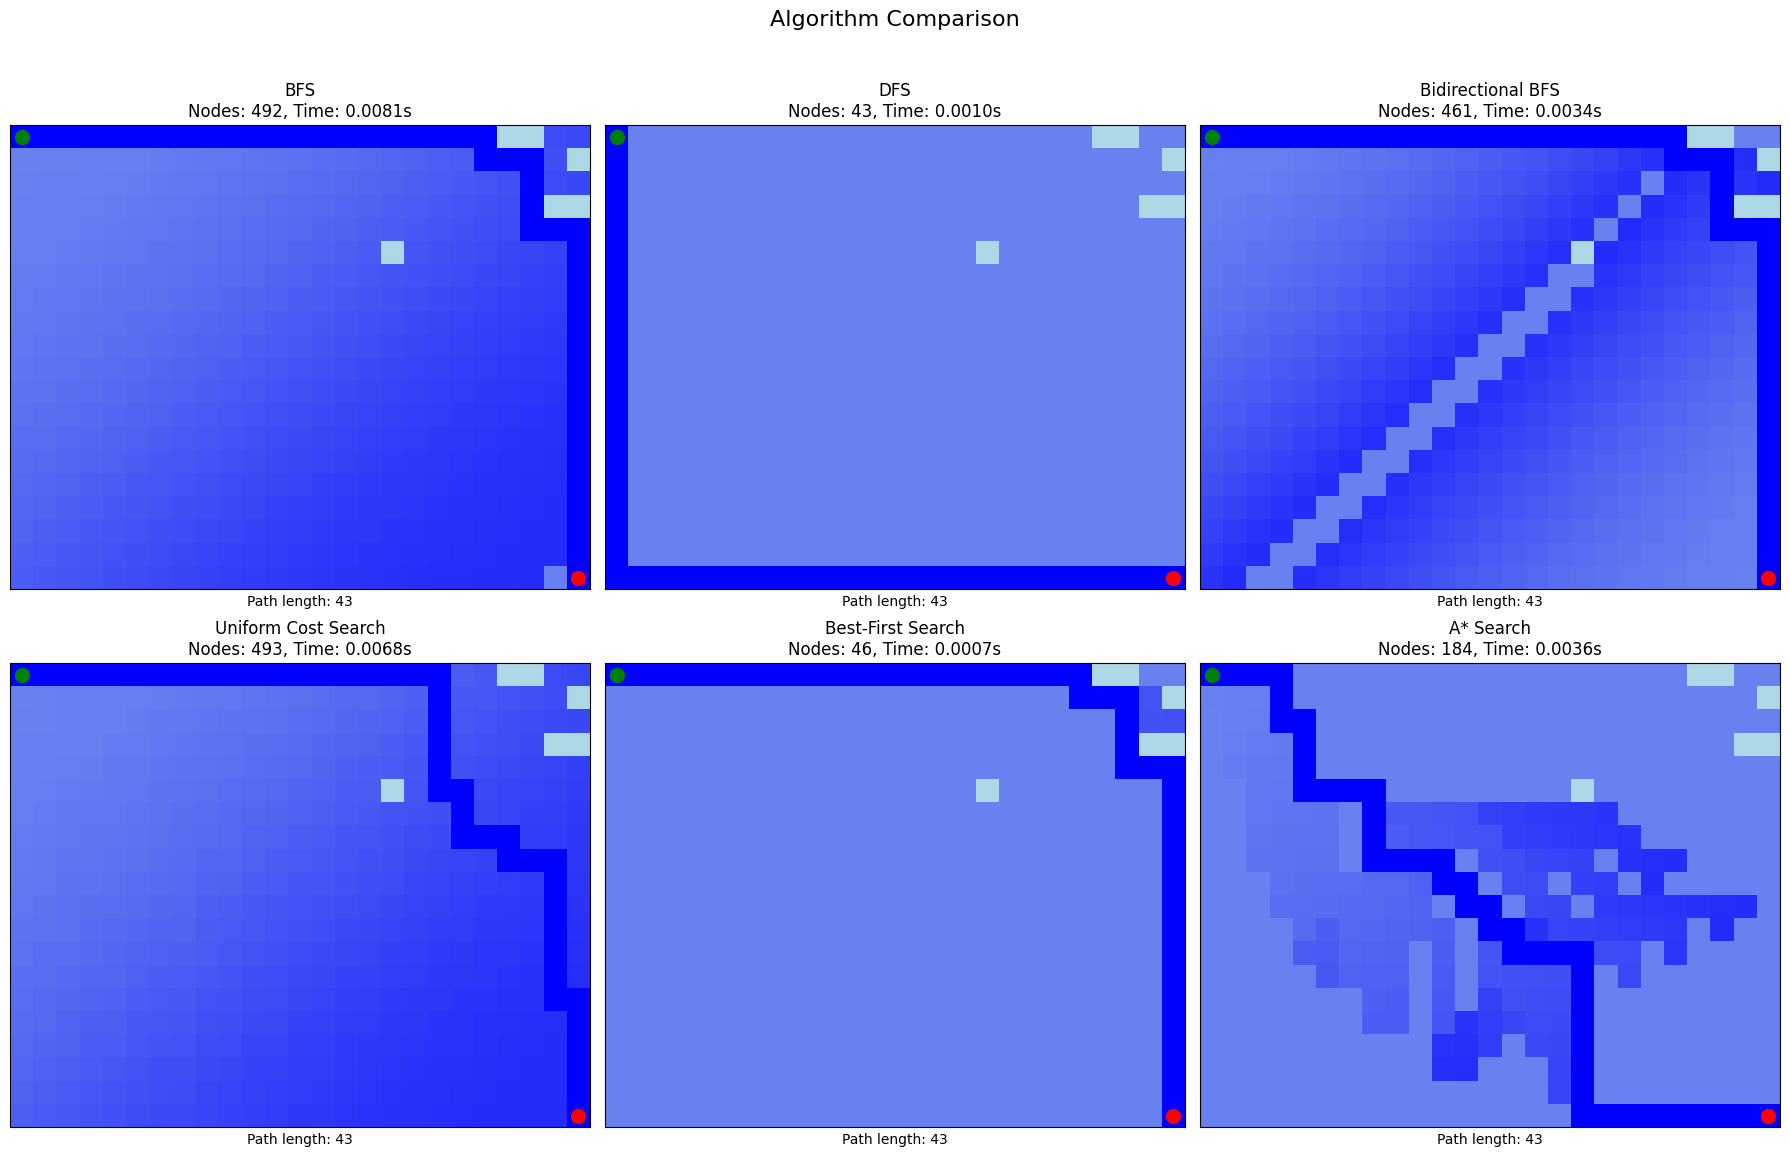


Comparative Study Results:
------------------------------------------------------------------------------------------
Algorithm            Nodes Explored  Time (s)   Path Length     Optimal   
------------------------------------------------------------------------------------------
BFS                  492             0.008126 43              Yes       
DFS                  43              0.001030 43              No        
Bidirectional BFS    461             0.003384 43              Yes       
UCS                  493             0.006782 43              Yes       
Best-First Search    46              0.000703 43              No        
A* Search            184             0.003630 43              Yes       
------------------------------------------------------------------------------------------


In [4]:
import heapq
import time
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap

class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0, heuristic=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.heuristic = heuristic
        self.depth = 0 if parent is None else parent.depth + 1
        
    def __lt__(self, other):
        return (self.path_cost + self.heuristic) < (other.path_cost + other.heuristic)
        
    def path(self):
        """Return a list of states from the root to this node."""
        node, path_back = self, []
        while node:
            path_back.append(node.state)
            node = node.parent
        return list(reversed(path_back))

class SearchProblem:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.height = len(grid)
        self.width = len(grid[0])
        self.nodes_explored = 0
        
    def is_goal(self, state):
        """Check if state is the goal state."""
        return state == self.goal
        
    def actions(self, state):
        """Return the actions that can be executed in given state."""
        x, y = state
        actions = []
        
        # Check all four possible moves: up, right, down, left
        for dx, dy in [(0, -1), (1, 0), (0, 1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.width and 0 <= ny < self.height and self.grid[ny][nx] == 0:
                actions.append((dx, dy))
                
        return actions
        
    def result(self, state, action):
        """Return the state that results from executing action in state."""
        x, y = state
        dx, dy = action
        return (x + dx, y + dy)
    
    def path_cost(self, cost_so_far, state1, action, state2):
        """Return the cost of a solution path that arrives at state2."""
        return cost_so_far + 1
        
    def heuristic(self, state):
        """Return the heuristic distance to goal."""
        x1, y1 = state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)  # Manhattan distance
    
    def euclidean_heuristic(self, state):
        """Return the Euclidean distance to goal."""
        x1, y1 = state
        x2, y2 = self.goal
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# Search Algorithms
def breadth_first_search(problem, visualize=False):
    """Search the shallowest nodes in the search tree first."""
    problem.nodes_explored = 0
    start_time = time.time()
    
    node = Node(state=problem.start)
    if problem.is_goal(node.state):
        return {"path": node.path(), "nodes_explored": 1, "time": time.time() - start_time}
    
    frontier = deque([node])  # FIFO queue
    explored = set()
    visited_order = {}  # For visualization: maps state to order of visit
    counter = 0
    
    while frontier:
        node = frontier.popleft()
        explored.add(node.state)
        problem.nodes_explored += 1
        
        if visualize:
            visited_order[node.state] = counter
            counter += 1
        
        for action in problem.actions(node.state):
            child_state = problem.result(node.state, action)
            if child_state not in explored and not any(n.state == child_state for n in frontier):
                child = Node(
                    state=child_state,
                    parent=node,
                    action=action,
                    path_cost=problem.path_cost(node.path_cost, node.state, action, child_state)
                )
                if problem.is_goal(child.state):
                    if visualize:
                        visited_order[child.state] = counter
                    return {
                        "path": child.path(),
                        "nodes_explored": problem.nodes_explored,
                        "time": time.time() - start_time,
                        "visited_order": visited_order
                    }
                frontier.append(child)
    
    return {"path": None, "nodes_explored": problem.nodes_explored, "time": time.time() - start_time}

def depth_first_search(problem, visualize=False):
    """Search the deepest nodes in the search tree first."""
    problem.nodes_explored = 0
    start_time = time.time()
    
    node = Node(state=problem.start)
    if problem.is_goal(node.state):
        return {"path": node.path(), "nodes_explored": 1, "time": time.time() - start_time}
    
    frontier = [node]  # Stack
    explored = set()
    visited_order = {}  # For visualization
    counter = 0
    
    while frontier:
        node = frontier.pop()
        explored.add(node.state)
        problem.nodes_explored += 1
        
        if visualize:
            visited_order[node.state] = counter
            counter += 1
        
        for action in problem.actions(node.state):
            child_state = problem.result(node.state, action)
            if child_state not in explored and not any(n.state == child_state for n in frontier):
                child = Node(
                    state=child_state,
                    parent=node,
                    action=action,
                    path_cost=problem.path_cost(node.path_cost, node.state, action, child_state)
                )
                if problem.is_goal(child_state):
                    if visualize:
                        visited_order[child.state] = counter
                    return {
                        "path": child.path(), 
                        "nodes_explored": problem.nodes_explored,
                        "time": time.time() - start_time,
                        "visited_order": visited_order
                    }
                frontier.append(child)
    
    return {"path": None, "nodes_explored": problem.nodes_explored, "time": time.time() - start_time}

def bidirectional_bfs(problem, visualize=False):
    """Search using two BFS searches from start and goal simultaneously."""
    problem.nodes_explored = 0
    start_time = time.time()
    
    if problem.start == problem.goal:
        return {"path": [problem.start], "nodes_explored": 1, "time": time.time() - start_time}
    
    # Forward search from start
    start_node = Node(state=problem.start)
    start_frontier = deque([start_node])
    start_explored = {problem.start: start_node}
    
    # Backward search from goal
    goal_node = Node(state=problem.goal)
    goal_frontier = deque([goal_node])
    goal_explored = {problem.goal: goal_node}
    
    visited_order = {}  # For visualization
    counter = 0
    
    while start_frontier and goal_frontier:
        # Expand in forward direction
        if start_frontier:
            s = start_frontier.popleft()
            problem.nodes_explored += 1
            
            if visualize:
                visited_order[s.state] = counter
                counter += 1
            
            if s.state in goal_explored:
                # Found path, reconstruct it
                path = s.path()
                g_path = goal_explored[s.state].path()
                g_path.reverse()
                g_path.pop(0)  # Remove the shared middle node
                path.extend(g_path)
                return {
                    "path": path,
                    "nodes_explored": problem.nodes_explored,
                    "time": time.time() - start_time,
                    "visited_order": visited_order
                }
            
            for action in problem.actions(s.state):
                child_state = problem.result(s.state, action)
                if child_state not in start_explored:
                    child = Node(
                        state=child_state,
                        parent=s,
                        action=action,
                        path_cost=problem.path_cost(s.path_cost, s.state, action, child_state)
                    )
                    start_frontier.append(child)
                    start_explored[child_state] = child
        
        # Expand in backward direction
        if goal_frontier:
            g = goal_frontier.popleft()
            problem.nodes_explored += 1
            
            if visualize:
                visited_order[g.state] = counter
                counter += 1
            
            if g.state in start_explored:
                # Found path, reconstruct it
                path = start_explored[g.state].path()
                g_path = g.path()
                g_path.reverse()
                g_path.pop(0)  # Remove the shared middle node
                path.extend(g_path)
                return {
                    "path": path,
                    "nodes_explored": problem.nodes_explored,
                    "time": time.time() - start_time,
                    "visited_order": visited_order
                }
            
            for action in problem.actions(g.state):
                parent_state = problem.result(g.state, action)  # Use result for reverse actions
                if parent_state not in goal_explored:
                    parent = Node(
                        state=parent_state,
                        parent=g,
                        action=action,
                        path_cost=problem.path_cost(g.path_cost, g.state, action, parent_state)
                    )
                    goal_frontier.append(parent)
                    goal_explored[parent_state] = parent
    
    return {"path": None, "nodes_explored": problem.nodes_explored, "time": time.time() - start_time}

def uniform_cost_search(problem, visualize=False):
    """Search the node of least path cost first."""
    problem.nodes_explored = 0
    start_time = time.time()
    
    node = Node(state=problem.start)
    if problem.is_goal(node.state):
        return {"path": node.path(), "nodes_explored": 1, "time": time.time() - start_time}
    
    frontier = []  # Priority queue
    heapq.heappush(frontier, (node.path_cost, node))  # (priority, node)
    explored = set()
    frontier_state_lookup = {problem.start: node.path_cost}  # Maps state to its lowest known cost
    
    visited_order = {}  # For visualization
    counter = 0
    
    while frontier:
        _, node = heapq.heappop(frontier)
        
        if problem.is_goal(node.state):
            if visualize:
                visited_order[node.state] = counter
            return {
                "path": node.path(),
                "nodes_explored": problem.nodes_explored,
                "time": time.time() - start_time,
                "visited_order": visited_order
            }
        
        if node.state not in explored:
            explored.add(node.state)
            problem.nodes_explored += 1
            
            if visualize:
                visited_order[node.state] = counter
                counter += 1
            
            for action in problem.actions(node.state):
                child_state = problem.result(node.state, action)
                child = Node(
                    state=child_state,
                    parent=node,
                    action=action,
                    path_cost=problem.path_cost(node.path_cost, node.state, action, child_state)
                )
                
                if child_state not in explored and (
                    child_state not in frontier_state_lookup or 
                    child.path_cost < frontier_state_lookup[child_state]
                ):
                    frontier_state_lookup[child_state] = child.path_cost
                    heapq.heappush(frontier, (child.path_cost, child))
    
    return {"path": None, "nodes_explored": problem.nodes_explored, "time": time.time() - start_time}

def best_first_search(problem, visualize=False):
    """Search the nodes with the lowest heuristic first."""
    problem.nodes_explored = 0
    start_time = time.time()
    
    node = Node(state=problem.start, heuristic=problem.heuristic(problem.start))
    if problem.is_goal(node.state):
        return {"path": node.path(), "nodes_explored": 1, "time": time.time() - start_time}
    
    frontier = []  # Priority queue
    heapq.heappush(frontier, (node.heuristic, node))  # (priority, node)
    explored = set()
    frontier_state_lookup = {problem.start: node.heuristic}  # Maps state to its lowest known heuristic
    
    visited_order = {}  # For visualization
    counter = 0
    
    while frontier:
        _, node = heapq.heappop(frontier)
        
        if problem.is_goal(node.state):
            if visualize:
                visited_order[node.state] = counter
            return {
                "path": node.path(),
                "nodes_explored": problem.nodes_explored,
                "time": time.time() - start_time,
                "visited_order": visited_order
            }
        
        if node.state not in explored:
            explored.add(node.state)
            problem.nodes_explored += 1
            
            if visualize:
                visited_order[node.state] = counter
                counter += 1
            
            for action in problem.actions(node.state):
                child_state = problem.result(node.state, action)
                heuristic = problem.heuristic(child_state)
                child = Node(
                    state=child_state,
                    parent=node,
                    action=action,
                    path_cost=problem.path_cost(node.path_cost, node.state, action, child_state),
                    heuristic=heuristic
                )
                
                if child_state not in explored and (
                    child_state not in frontier_state_lookup or 
                    heuristic < frontier_state_lookup[child_state]
                ):
                    frontier_state_lookup[child_state] = heuristic
                    heapq.heappush(frontier, (heuristic, child))
    
    return {"path": None, "nodes_explored": problem.nodes_explored, "time": time.time() - start_time}

def a_star_search(problem, visualize=False):
    """Search the node that has the lowest combined cost and heuristic first."""
    problem.nodes_explored = 0
    start_time = time.time()
    
    node = Node(
        state=problem.start,
        path_cost=0,
        heuristic=problem.heuristic(problem.start)
    )
    if problem.is_goal(node.state):
        return {"path": node.path(), "nodes_explored": 1, "time": time.time() - start_time}
    
    frontier = []  # Priority queue
    f_value = node.path_cost + node.heuristic
    heapq.heappush(frontier, (f_value, node))  # (priority, node)
    
    explored = set()
    frontier_state_lookup = {problem.start: f_value}  # Maps state to its lowest known f-value
    
    visited_order = {}  # For visualization
    counter = 0
    
    while frontier:
        _, node = heapq.heappop(frontier)
        
        if problem.is_goal(node.state):
            if visualize:
                visited_order[node.state] = counter
            return {
                "path": node.path(),
                "nodes_explored": problem.nodes_explored,
                "time": time.time() - start_time,
                "visited_order": visited_order
            }
        
        if node.state not in explored:
            explored.add(node.state)
            problem.nodes_explored += 1
            
            if visualize:
                visited_order[node.state] = counter
                counter += 1
            
            for action in problem.actions(node.state):
                child_state = problem.result(node.state, action)
                cost = problem.path_cost(node.path_cost, node.state, action, child_state)
                heuristic = problem.heuristic(child_state)
                
                child = Node(
                    state=child_state,
                    parent=node,
                    action=action,
                    path_cost=cost,
                    heuristic=heuristic
                )
                
                f_value = child.path_cost + child.heuristic
                
                if child_state not in explored and (
                    child_state not in frontier_state_lookup or 
                    f_value < frontier_state_lookup[child_state]
                ):
                    frontier_state_lookup[child_state] = f_value
                    heapq.heappush(frontier, (f_value, child))
    
    return {"path": None, "nodes_explored": problem.nodes_explored, "time": time.time() - start_time}

# Visualization functions
def visualize_grid_search(problem, results, title="Algorithm Comparison"):
    """Visualize the search paths and exploration order on the grid."""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    algorithms = [
        "BFS", "DFS", "Bidirectional BFS", 
        "Uniform Cost Search", "Best-First Search", "A* Search"
    ]
    
    # Create colormap for visualization
    n_colors = 256
    visit_cmap = LinearSegmentedColormap.from_list(
        "visit_order", ["lightblue", "blue"], N=n_colors
    )
    
    for i, (algo_name, result) in enumerate(zip(algorithms, results)):
        grid = np.array(problem.grid)
        grid_visual = np.zeros_like(grid, dtype=float)
        grid_visual[grid == 1] = -1  # Walls
        
        # Mark start and goal
        sy, sx = problem.start[1], problem.start[0]
        gy, gx = problem.goal[1], problem.goal[0]
        
        # Plot exploration order
        if "visited_order" in result:
            max_order = max(result["visited_order"].values())
            for state, order in result["visited_order"].items():
                x, y = state
                normalized_order = order / max_order
                grid_visual[y, x] = normalized_order
        
        # Plot path
        if result["path"]:
            for state in result["path"]:
                x, y = state
                grid_visual[y, x] = 1.5  # Special color for path
        
        # Show grid
        ax = axes[i]
        im = ax.imshow(grid_visual, cmap=visit_cmap, interpolation='nearest')
        
        # Mark start and goal clearly
        ax.plot(sx, sy, 'go', markersize=10, label='Start')
        ax.plot(gx, gy, 'ro', markersize=10, label='Goal')
        
        # Show exploration stats
        ax.set_title(f"{algo_name}\nNodes: {result['nodes_explored']}, Time: {result['time']:.4f}s")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add path length info if a path was found
        if result["path"]:
            path_len = len(result["path"]) - 1  # Subtract 1 because start node is included
            ax.set_xlabel(f"Path length: {path_len}")
        else:
            ax.set_xlabel("No path found")
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.92)
    return fig

def run_comparative_study(maze, start, goal, visualize=True):
    """Run all algorithms on the same problem and compare."""
    problem = SearchProblem(maze, start, goal)
    
    # Run all algorithms
    bfs_result = breadth_first_search(problem, visualize)
    dfs_result = depth_first_search(problem, visualize)
    bi_bfs_result = bidirectional_bfs(problem, visualize)
    ucs_result = uniform_cost_search(problem, visualize)
    best_fs_result = best_first_search(problem, visualize)
    astar_result = a_star_search(problem, visualize)
    
    results = [bfs_result, dfs_result, bi_bfs_result, ucs_result, best_fs_result, astar_result]
    
    # Create summary table
    algorithms = ["BFS", "DFS", "Bidirectional BFS", "UCS", "Best-First Search", "A* Search"]
    summary = []
    
    for algo, result in zip(algorithms, results):
        path_length = len(result["path"]) - 1 if result["path"] else "N/A"
        summary.append({
            "Algorithm": algo,
            "Nodes Explored": result["nodes_explored"],
            "Time (s)": result["time"],
            "Path Length": path_length,
            "Optimal": "Yes" if algo in ["BFS", "UCS", "A* Search", "Bidirectional BFS"] 
                      and path_length != "N/A" else "No"
        })
    
    # Visualize the search if requested
    if visualize:
        fig = visualize_grid_search(problem, results)
        plt.show()
    
    return summary

# Example usage
def create_maze(width=20, height=20, obstacle_density=0.3, seed=42):
    """Create a random maze for testing."""
    np.random.seed(seed)
    maze = np.random.random((height, width)) < obstacle_density
    maze = maze.astype(int)
    
    # Ensure start and end are clear
    start = (0, 0)
    goal = (width-1, height-1)
    maze[start[1], start[0]] = 0
    maze[goal[1], goal[0]] = 0
    
    # Ensure path exists using DFS
    def dfs_create_path(pos, goal):
        x, y = pos
        if pos == goal:
            return True
        
        # Mark current position as visited
        maze[y, x] = 2  # Temporary marking
        
        # Try all four directions in random order
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        np.random.shuffle(directions)
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height:
                if maze[ny, nx] == 0 or maze[ny, nx] == 1:
                    maze[ny, nx] = 0  # Clear path
                    if dfs_create_path((nx, ny), goal):
                        return True
        
        return False
    
    dfs_create_path(start, goal)
    
    # Reset temporary markings
    maze[maze == 2] = 0
    
    return maze.tolist()

# Create and run examples
def run_example():
    """Run an example comparative study."""
    print("Generating maze...")
    maze = create_maze(width=25, height=20, obstacle_density=0.3)
    start = (0, 0)
    goal = (24, 19)  # Bottom right corner
    
    print("Running comparative study...")
    results = run_comparative_study(maze, start, goal)
    
    # Print table of results
    print("\nComparative Study Results:")
    print("-" * 90)
    print(f"{'Algorithm':<20} {'Nodes Explored':<15} {'Time (s)':<10} {'Path Length':<15} {'Optimal':<10}")
    print("-" * 90)
    for result in results:
        print(f"{result['Algorithm']:<20} {result['Nodes Explored']:<15} {result['Time (s)']:.6f} {result['Path Length']:<15} {result['Optimal']:<10}")
    print("-" * 90)
    
    return results

if __name__ == "__main__":
    run_example()